## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### 1. Importing the libraries


In [1]:
# importing the libraries and warnings
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2. Reading the Dataset


In [3]:
#Reading the dataset in leads
leads = pd.read_csv("Leads.csv")

In [3]:
#reading the head of dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2.1 Examining the data set


In [4]:
leads.shape

(9240, 37)

#### The dataset Leads has 37 columns and 9240 rows

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Finding out the summary for numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#check for duplicates based on Prospect ID
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#check for duplicates based on Lead Number 
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

#### It can be inferred that there are no duplicate entries present as these two variables prospect id and lead number seems to be unique identification and thus these two columns can be dropped

### 2.2 Data Cleaning


In [9]:
#dropping Lead Number and Prospect ID since they have all unique values
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
# Converting 'Select' values to NaN
leads = leads.replace('Select', np.nan)

In [12]:
#checking null values in each rows in percentage
missing_val_perc = round(100*leads.isnull().sum()/leads.shape[0],2).sort_values(ascending = False)
missing_val_perc

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [13]:
# Finding the columns having null values and finding the number of columns having null values
null_columns  = missing_val_perc[missing_val_perc>0]
null_columns

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

#### Creating a function to remove null values for data cleaning

In [14]:
# Function to remove null values
def remove_null_val(dataset,percent):
    df = dataset.copy()
    null_col = list(missing_val_perc[missing_val_perc>=percent].index)
    df.drop(columns = null_col, inplace = True)
    print("The number of columns dropped is",len(null_col))
    print("The shape of the new dataset is",df.shape)
    return df

In [15]:
# Identifying the columns having null values equal or more than 40%
null_40 = missing_val_perc[missing_val_perc >= 40] 
print("The number of columns having null values greater than 40% is",len(null_40))

The number of columns having null values greater than 40% is 7


#### Fixing the missing values in columns by removing the columns with null values percentage greater than 40%

In [16]:
# dropping columns using remove_null_val function
leads = remove_null_val(leads,40)

The number of columns dropped is 7
The shape of the new dataset is (9240, 28)


#### Imputing the missing values

In [17]:
# Categorical Variable Analysis for city
leads['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

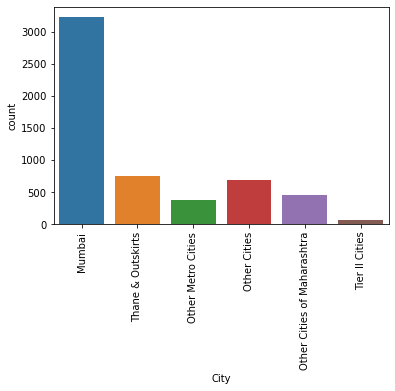

In [18]:
# Plotting the values of cities 
sns.countplot(leads.City)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# Imputing Null values with 'Others'
leads['City'] = leads['City'].replace(np.nan, 'Others')

In [20]:
# Merging Cities which are low in numbers to 'Others'
leads['City'] = leads['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [21]:
leads['City'].value_counts(dropna = False)

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

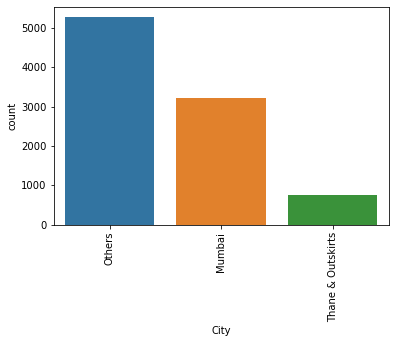

In [22]:
# Plotting the values of cities 
sns.countplot(leads.City)
plt.xticks(rotation = 90)
plt.show()

In [23]:
# Categorical Variable Analysis for Specialization
leads['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

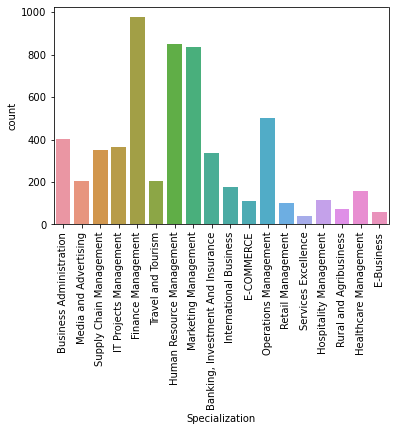

In [24]:
# Plotting the values of Specialization
sns.countplot(leads.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [25]:


# Imputing Null values with 'Not available'
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not available')

In [26]:
leads['Specialization'].value_counts(dropna = False)

Not available                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

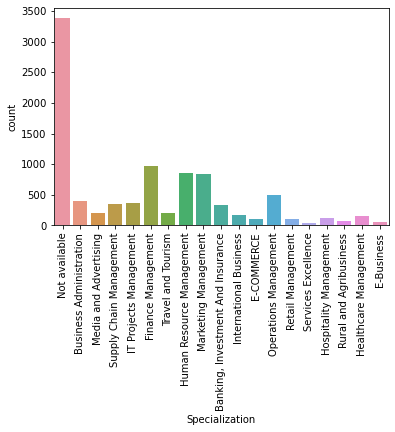

In [27]:
# Plotting the values of Specialization
sns.countplot(leads.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [28]:
# Categorical Variable Analysis for Tags
leads['Tags'].value_counts(dropna = False).sort_values(ascending = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

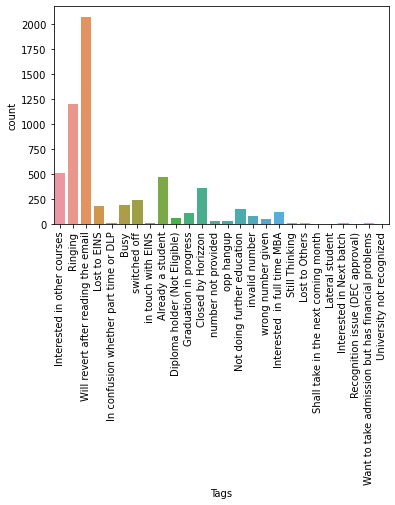

In [29]:
# Plotting the values of Tags
sns.countplot(leads.Tags)
plt.xticks(rotation = 90)
plt.show()


In [30]:
# Imputing Null with Others
leads['Tags'] = leads['Tags'].replace(np.nan, 'Other Status')

# Merging the columns with count less than 400 is merged into Other Status 
leads['Tags'] = leads['Tags'].replace(['Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA'
                                      'Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup',
                                      'number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems',
                                      'Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student',
                                      'Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)','Interested  in full time MBA','Graduation in progress'],'Other Status')

In [31]:
leads['Tags'].value_counts(dropna = False)

Other Status                           4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

In [32]:
# Categorical Variable Analysis for What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(dropna = False)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

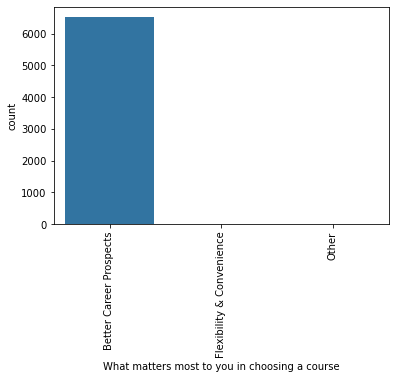

In [33]:
# Checking What matters most to you in choosing a course
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [34]:
## dropping 'What matters most to you in choosing a course' as it is highly skewed
leads.drop('What matters most to you in choosing a course',axis=1,inplace = True)

In [35]:
leads.shape

(9240, 27)

In [36]:
# Categorical Variable Analysis for What is your current occupation
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

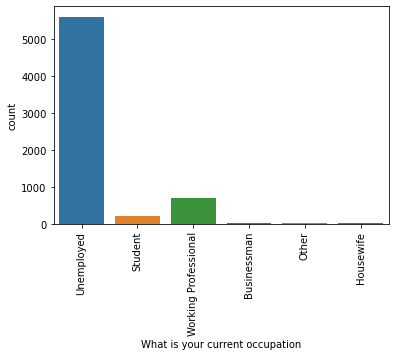

In [37]:
# Checking What is your current occupation
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [38]:
#Imputing null value with 'Other' 
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Other')

In [39]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

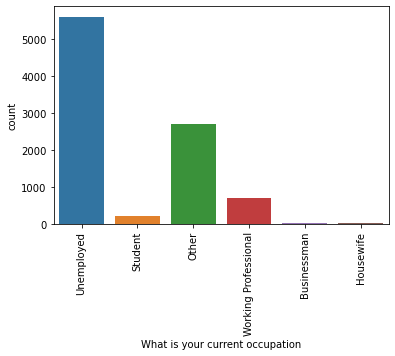

In [40]:
# Checking What is your current occupation
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [41]:
# Categorical Variable Analysis for country
leads['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

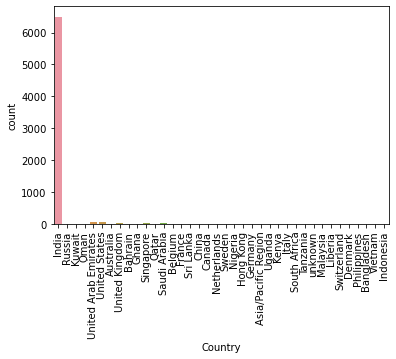

In [42]:
# Plotting the values of Country
sns.countplot(leads.Country)
plt.xticks(rotation = 90)
plt.show()


In [43]:
# dropping 'Country' as it is highly skewed
leads.drop('Country',axis=1, inplace = True)

In [44]:
# checking Last Activity columns
leads['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
# Imputing Null with Others
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Others')

# Merging attributes value counts less than 100 to Others
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [46]:
# checking Last Activity columns
leads['Last Activity'].value_counts(dropna = False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [47]:
# checking Lead source columns
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [48]:
# Replacing google with Google in Lead Source
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [49]:
# Imputing Null with Others
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Others')

# Merging attributes value counts less than 100 to Others
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [50]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64

In [51]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [52]:
# Merging categories with frequency < 100 to Others
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                                                         'Had a Phone Conversation', 'Email Marked Spam', 
                                                                         'Resubscribed to emails', 'Approached upfront', 
                                                                         'Email Received', 'Form Submitted on Website', 
                                                                         'View in browser link Clicked'], 'Others')

In [53]:
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [55]:
#Imputing null value of Total Visits
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [56]:
# Imputing Page Views Per Visit using median
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan,leads['Page Views Per Visit'].median())


In [57]:
# Checking if all the null values are treated 
leads.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content         

#### There are no null values in the dataset now 


### Analysing the categorical variables

In [58]:
# for all categorical columns identifying the value counts of all categories
leads_cat = leads.loc[:, leads.dtypes == 'object']
for i in leads_cat:
    print(leads[i].astype('category').value_counts())
    print('**********************************************')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**********************************************
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64
**********************************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
**********************************************
No     9238
Yes       2
Name: Do Not Call, dtype: int64
**********************************************
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
For

### Dropping below columns because of high skewness
1. Do Not Email
2. Do Not Call
3. Search
4. Newspaper Article
5. X Education Forums
6. Digital Advertisement
7. Through Recommendations

### Dropping below columns because of single category
1. Magazine
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. Get updates on DM Content
5. I agree to pay the amount through cheque


In [59]:
columns_to_drop = ['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                'Through Recommendations', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                'Get updates on DM Content', 'I agree to pay the amount through cheque']
leads.drop(columns_to_drop, axis=1, inplace=True)

In [60]:
#Checking the updated Dataset shape
leads.shape

(9240, 13)

### 3. Visualizing and Analyzing the Dataset


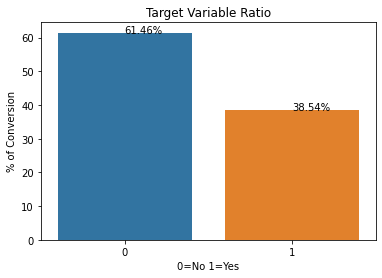

In [61]:
# Visualizing the converted data and finding the distribution using percentage 
ax = sns.barplot(x='Converted', y='Converted', data=leads, estimator=lambda x: len(x) / len(leads) * 100)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('0=No 1=Yes')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

#### Inference 
The leads converted are less and are 38.54% of the total leads and the leads not converted are 61.46%

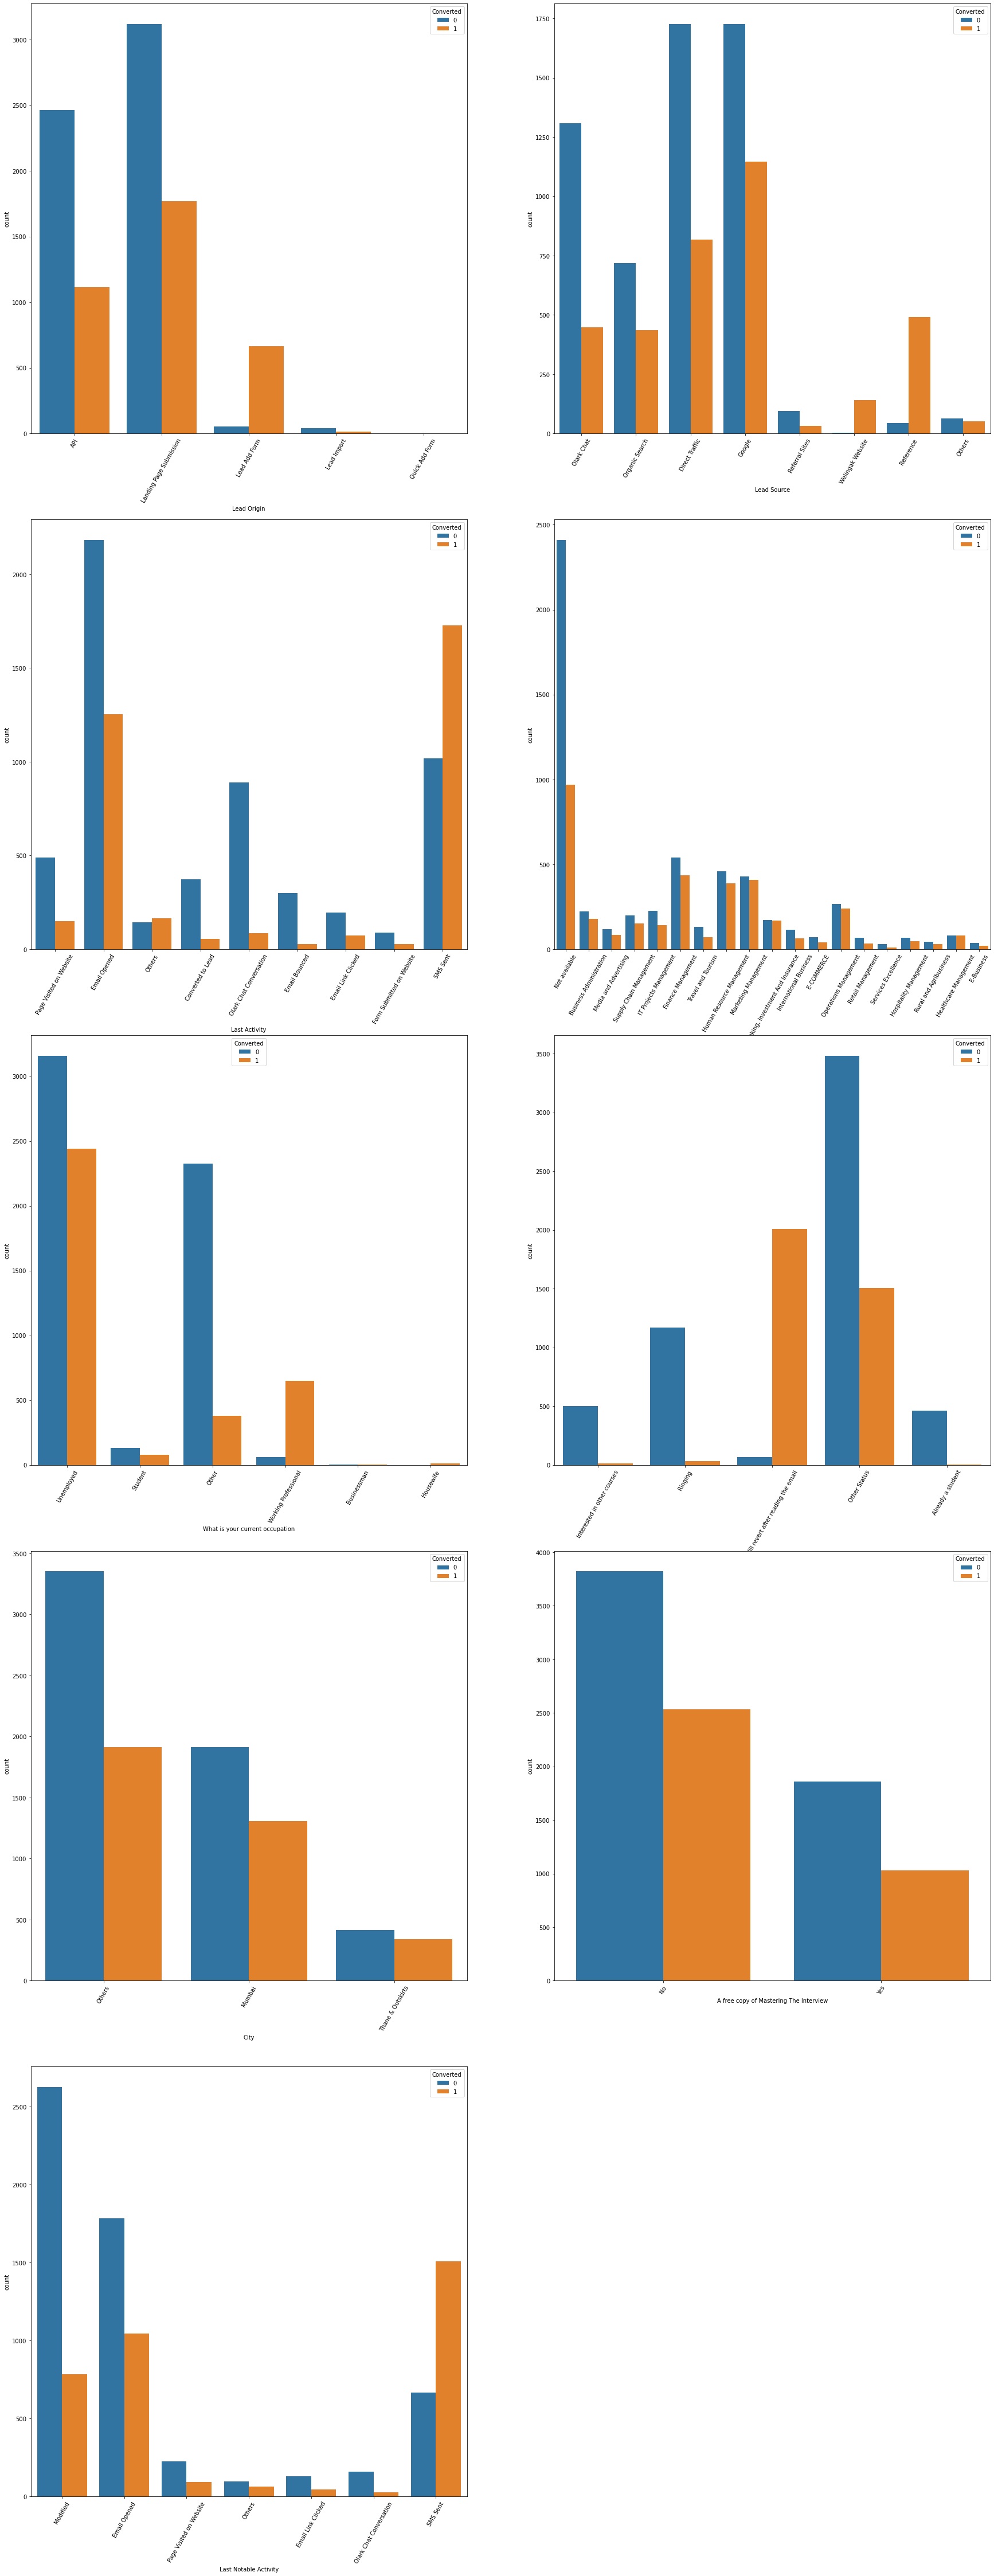

In [62]:
# Categorical Variable Analysis with Target variable 'Converted'
cat_vars = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']
plt.figure(figsize = (30,80))
for col in cat_vars:
    plt.subplot(5,2,cat_vars.index(col)+1)
    sns.countplot(x = col, hue = 'Converted', data = leads)
    plt.xticks(rotation = 60)

### Inference

#### 1. Lead Origin
-- API and Landing Page Submission have most lead originated from them 
-- Lead Add Form has highest conversion rate but count of lead are not very high

#### 2. Lead Source
-- Direct Traffic and Google are generating high number of leads

#### 3. Last Activity
--The leads from SMS sent and email open are higher and conversion rate is highest for SMS sent

#### 4. Specialization
-- The specialization not available has most leads and conversion rate is higher hence should be focussed 

#### 5. What is your current occupation
-- Unemployed has the highest leads and conversion rate is also higher
-- Working Professional also have higher conversion rate

#### 6. Tags
-- Will Revert after reading the email' have high conversion
-- Unspecified Tags have highest leads

#### 7. City
-- Other cities have highest leads

#### 8. A free copy of Mastering The Interview
-- Leads from those who do not ask for free copy of Mastering Interviews are higher so should be focused for conversion.

#### 9. Last Notable Activity
-- SMS sent have high converison rate


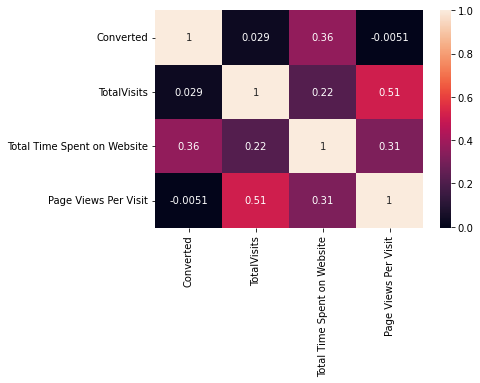

In [63]:
#Finding correlation between numerical variables
sns.heatmap(leads.corr(),annot=True)
plt.show()

#### Inference 
It can be seen that for the target variable converted, the highest correlation is with Total Time Spent on Website and the least is with Page Views Per Visit

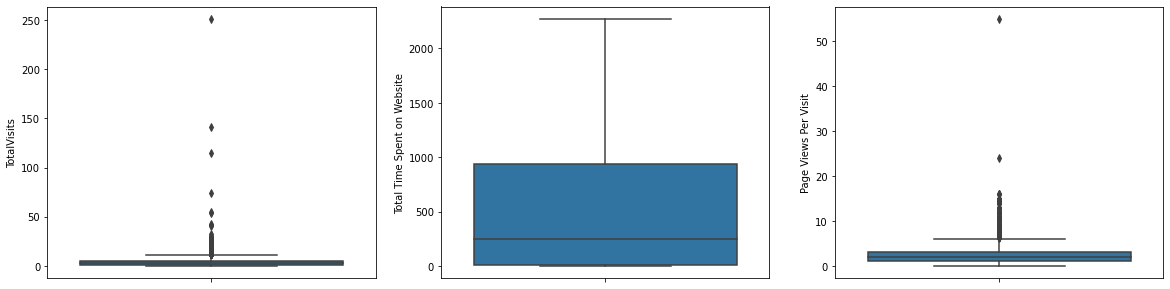

In [64]:
#Plotting box plot to identify the outliers in continuous variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = (20,5))
for col in num_vars:
    plt.subplot(1,3,num_vars.index(col)+1)
    sns.boxplot( y = col, data = leads)

There are outliers present in TotalVisits and Page Views Per Visit

In [65]:
# finding lower quantile(Q1) and upper quantile(Q2) and interquartile range(IQR)
Q1=leads[num_vars].quantile(.25)
Q3=leads[num_vars].quantile(.75)
IQR=Q3-Q1
print(IQR*1.5)
print(Q3+IQR*1.5) # As there are only upper bound outliers

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64
TotalVisits                      11.0
Total Time Spent on Website    2322.0
Page Views Per Visit              6.0
dtype: float64


In [66]:
# Imputing outliers with upper bound value
leads.loc[leads['TotalVisits']>11,'TotalVisits'] = 6
leads.loc[leads['Page Views Per Visit']>6,'Page Views Per Visit'] = 6

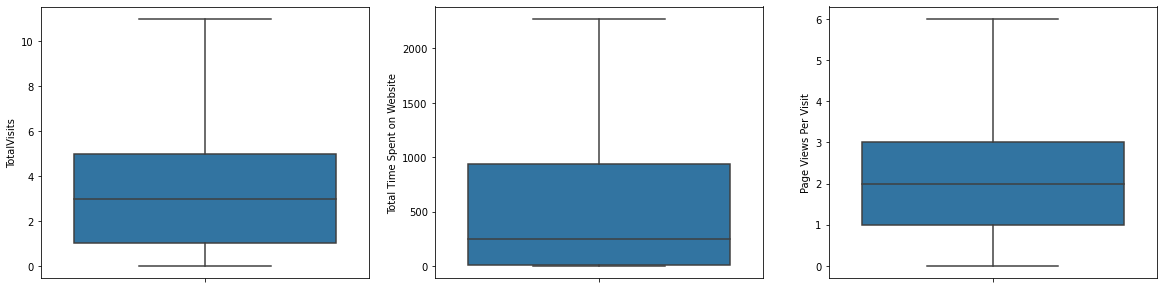

In [67]:
#Plotting box plot to validate the outliers in continuous variables are handled
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = (20,5))
for col in num_vars:
    plt.subplot(1,3,num_vars.index(col)+1)
    sns.boxplot( y = col, data = leads)

#### There are no outliers now in the updated dataset 

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

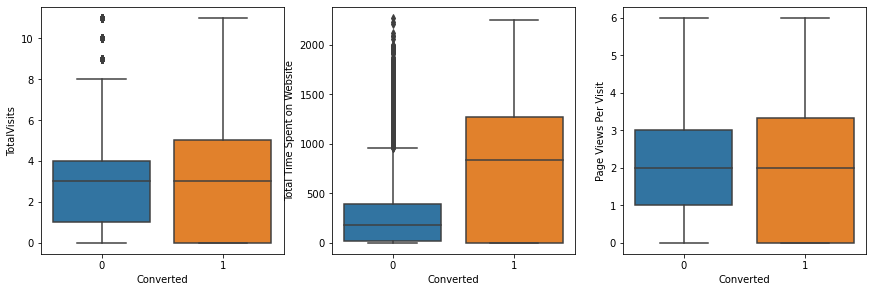

In [68]:
#Plotting numerical variables with target variable
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x='Converted',y='TotalVisits' , data=leads)
plt.subplot(2,4,2)
sns.boxplot(x='Converted',y='Total Time Spent on Website' , data=leads)
plt.subplot(2,4,3)
sns.boxplot(x='Converted',y='Page Views Per Visit' , data=leads)

### 4. Data Preparation


In [69]:
# Identifying the value counts of categorical variables of updated dataset
leads_cat = leads.loc[:, leads.dtypes == 'object']
for i in leads_cat:
    print(leads[i].astype('category').value_counts())
    print('**********************************************')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**********************************************
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64
**********************************************
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64
**********************************************
Not available                        3380
Finance Management                    976
Human Resou

In [70]:
# for interview related column, there are only two categories hence mapping it to 0 and 1 
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})
leads['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [71]:
# Creating dummy data for other categorical variables
leads = pd.get_dummies(data = leads, columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'], drop_first = True)

In [72]:
leads.shape

(9240, 59)

### 5. Model building


#### 5.1 Splitting the dataset

In [73]:
# Splitting the data into training and testing dataset
leads_train, leads_test = train_test_split(leads, train_size = 0.7, random_state=200)

#### 5.2 Rescaling the features

In [74]:
# Rescaling the features of training dataset
# Using min max scaler also known as normalization
scaler = MinMaxScaler()

In [75]:
#Printing the numerical variables
num_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [76]:
# Scaling training dataset of leads
leads_train[num_vars] = scaler.fit_transform(leads_train[num_vars])

In [77]:
# Identifying training dataset head
leads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9160,1,0.000000,0.000000,0.000,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
161,1,0.909091,0.798856,0.555,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5022,1,0.000000,0.000000,0.000,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2917,0,0.000000,0.000000,0.000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7665,0,0.000000,0.000000,0.000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [78]:
# For training data checking numerical variabled features
leads_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.385591,0.279628,0.215614,0.380084,0.311998,0.532622,0.074057,0.005566,0.000155,0.312771,...,0.129097,0.224644,0.570965,0.080550,0.304731,0.367965,0.019326,0.017780,0.033395,0.237786
std,0.486772,0.232292,0.240596,0.298477,0.463345,0.498973,0.261884,0.074403,0.012434,0.463658,...,0.335333,0.417380,0.494977,0.272164,0.460329,0.482289,0.137678,0.132161,0.179680,0.425760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.090909,0.006162,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.272727,0.110475,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.454545,0.413732,0.507083,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.3 Dividing the data into X and y

In [79]:
# Divinding the training data in X and y for model building
y_train = leads_train.pop('Converted')
X_train = leads_train

In [80]:
print(X_train.shape)
print(y_train.shape)

(6468, 58)
(6468,)


#### 5.4 Logistic Regression Model building

In [81]:
# Building a logistic model
logreg=LogisticRegression()

In [82]:
# Selecting 15 features for model
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Others', False, 13),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_SMS Sent', True, 1),
 (

In [84]:
# Printing columns supported by RFE 
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Tags_Other Status', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

For feature selection RFE was chosen as 15, multiple models were created taking under consideration – p value should be less than 0.05 and VIF should be less than 5 


#### 5.5 Model Optimization

In [85]:
# Function to create model using statsmodel_api
def build_model(cols):
    X_train_lm = sm.add_constant(X_train[cols]) # adding constant
    lm = sm.GLM(y_train, X_train_lm,family = sm.families.Binomial()).fit() # fitting model
    print(lm.summary()) # printing summary
    return lm
    

In [86]:
# Function to calculate VIF 
def cal_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF', ascending = False))  

#### Model 1

In [87]:
#calling function for model building and VIF calculation
build_model(col)
cal_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1625.0
Date:                Tue, 28 Feb 2023   Deviance:                       3249.9
Time:                        14:34:10   Pearson chi2:                 1.20e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model 2

In [88]:
# Dropping Lead Source_Welingak Website since it has a very high p-value
col = col.drop('Lead Source_Welingak Website')

In [89]:
# Creating new model using optimized columns
build_model(col)
cal_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1634.2
Date:                Tue, 28 Feb 2023   Deviance:                       3268.4
Time:                        14:34:12   Pearson chi2:                 1.45e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model 3

In [90]:
# Dropping Tags_Ringing Per Visit since it has a high VIF value
col = col.drop('Tags_Ringing')

In [91]:
# Creating new model using optimized columns
build_model(col)
cal_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1636.9
Date:                Tue, 28 Feb 2023   Deviance:                       3273.7
Time:                        14:34:14   Pearson chi2:                 1.37e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Model 4

In [92]:
col = col.drop('Page Views Per Visit')

In [93]:
build_model(col)
cal_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1655.0
Date:                Tue, 28 Feb 2023   Deviance:                       3310.0
Time:                        14:34:18   Pearson chi2:                 1.47e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [94]:
col = col.drop('Tags_Other Status')

In [95]:
build_model(col)
cal_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.5
Date:                Tue, 28 Feb 2023   Deviance:                       4072.9
Time:                        14:34:20   Pearson chi2:                 1.77e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Final Model

In [96]:
# printing the columns of final model
X_train_lm = sm.add_constant(X_train[col])

In [97]:
# Building final model lr_final using above columns
lm_final = build_model(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.5
Date:                Tue, 28 Feb 2023   Deviance:                       4072.9
Time:                        14:34:23   Pearson chi2:                 1.77e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [98]:
# Printing VIF for final model
cal_vif(col)

                                             Features   VIF
5                              Last Activity_SMS Sent  5.23
10                     Last Notable Activity_SMS Sent  4.97
0                                         TotalVisits  2.27
1                         Total Time Spent on Website  2.22
8            Tags_Will revert after reading the email  1.87
6               What is your current occupation_Other  1.55
7   What is your current occupation_Working Profes...  1.31
3                              Lead Source_Olark Chat  1.29
2                           Lead Origin_Lead Add Form  1.16
4                         Last Activity_Email Bounced  1.08
9                        Last Notable Activity_Others  1.08


In [99]:
#Calculating predictive value based on model
y_train_pred = lm_final.predict(X_train_lm).values.reshape(-1)

In [100]:
# Creating a data frame for y values and predictive y values
y_train_pred_final=pd.DataFrame({'Converted_leads':y_train.values,'Conversion_Probability':y_train_pred})

In [101]:
# First keeping the conversion rate at 0.5 
y_train_pred_final['Predicted_value']=y_train_pred_final['Conversion_Probability'].map(lambda x:1 if x>0.5 else 0)

In [102]:
y_train_pred_final.head()

,Converted_leads,Conversion_Probability,Predicted_value
0,1,0.997194,1
1,1,0.999513,1
2,1,0.995615,1
3,0,0.242178,0
4,0,0.151815,0


In [103]:
#Creating confusion matrix 
confusion=metrics.confusion_matrix(y_train_pred_final.Converted_leads,y_train_pred_final.Predicted_value)

In [104]:
print(confusion)

[[3733  241]
 [ 621 1873]]


In [105]:
# Calculating accuracy for model
print(metrics.accuracy_score(y_train_pred_final.Converted_leads,y_train_pred_final.Predicted_value))

0.8667285095856524


In [106]:
# For calculating model evaluation factors other than accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
#sensitivity or Recall
TP/float(TP+FN)

0.7510024057738572

In [108]:
#specificity
TN/float(TN+FP)

0.9393558127830901

In [109]:
#false positive rate
FP/float(TN+FP)

0.060644187216909916

In [110]:
#positive predictive or precision
TP/float(TP+FP)

0.8859981078524125

In [111]:
# negative predictive

TN/float(TN+FN)

0.8573725310059715

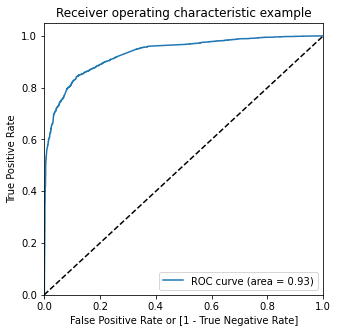

In [112]:
# Creating function for ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_leads,y_train_pred_final.Conversion_Probability, drop_intermediate = False )

# Calling the function
draw_roc(y_train_pred_final.Converted_leads,y_train_pred_final.Conversion_Probability)

In [113]:
print(classification_report( y_train_pred_final.Converted_leads,y_train_pred_final.Predicted_value ))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3974
           1       0.89      0.75      0.81      2494

    accuracy                           0.87      6468
   macro avg       0.87      0.85      0.85      6468
weighted avg       0.87      0.87      0.86      6468



### Finding optimal cutoff


In [114]:
#creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x> i else 0)
    
y_train_pred_final.head()

,Converted_leads,Conversion_Probability,Predicted_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.997194,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999513,1,1,1,1,1,1,1,1,1,1,1
2,1,0.995615,1,1,1,1,1,1,1,1,1,1,1
3,0,0.242178,0,1,1,1,0,0,0,0,0,0,0
4,0,0.151815,0,1,1,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_leads, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385591  1.000000  0.000000
0.1   0.1  0.676098  0.967522  0.493206
0.2   0.2  0.831014  0.894547  0.791142
0.3   0.3  0.861163  0.852847  0.866381
0.4   0.4  0.868275  0.804330  0.908405
0.5   0.5  0.866729  0.751002  0.939356
0.6   0.6  0.863636  0.714515  0.957222
0.7   0.7  0.851422  0.664395  0.968797
0.8   0.8  0.842455  0.623496  0.979869
0.9   0.9  0.829623  0.578589  0.987167


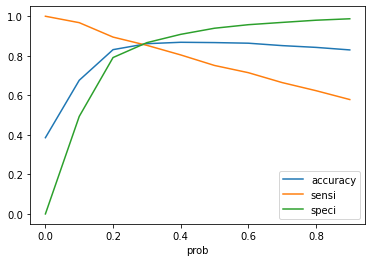

In [116]:
#plotting accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

In [117]:
#for .27
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x>.27 else 0)
y_train_pred_final.head()

,Converted_leads,Conversion_Probability,Predicted_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.997194,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999513,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.995615,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.242178,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.151815,0,1,1,0,0,0,0,0,0,0,0,0


In [118]:
# Finding the accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted_leads,y_train_pred_final.final_predicted))

0.8526592455163884


In [119]:
# Creating confusion matrix for final model
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted_leads,y_train_pred_final.final_predicted)

In [120]:
print(confusion2)

[[3362  612]
 [ 341 2153]]


In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
#sensitivity of our logistic regression model or Recall
TP / float(TP+FN)

0.8632718524458701

In [123]:
#  specificity
TN / float(TN+FP)

0.8459989934574735

In [124]:
# Positive predictive value or Precision 
print (TP / float(TP+FP))

0.7786618444846293


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9079125033756413


In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_leads, y_train_pred_final.Conversion_Probability)

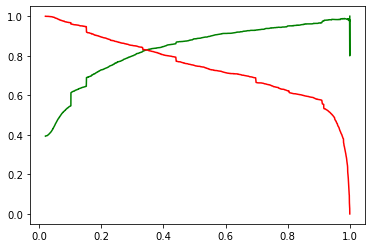

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted_leads,Conversion_Probability,Predicted_value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.997194,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999513,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.995615,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.242178,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.151815,0,1,1,0,0,0,0,0,0,0,0,0


In [129]:
# Calculating accuracy
accuracy_score(y_train_pred_final.Converted_leads, y_train_pred_final.final_predicted)


0.8688930117501547

In [130]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted_leads, y_train_pred_final.final_predicted )
confusion3

array([[3555,  419],
       [ 429, 2065]], dtype=int64)

In [131]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8279871692060946

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8945646703573226

In [134]:
# Calculate false postive rate - predicting converted when customer have not
print(FP/ float(TN+FP))

0.1054353296426774


In [135]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8313204508856683


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8923192771084337


### 6. Calculating Classification report for Precision Recall F1- score



In [137]:
print(classification_report( y_train_pred_final.Converted_leads,y_train_pred_final.Predicted_value ))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3974
           1       0.89      0.75      0.81      2494

    accuracy                           0.87      6468
   macro avg       0.87      0.85      0.85      6468
weighted avg       0.87      0.87      0.86      6468



### 7. Making Predictions Using the Final Model



In [138]:
num_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [139]:
leads_test[num_vars] = scaler.fit_transform(leads_test[num_vars])

In [140]:
# Dividing into X and y
y_test = leads_test.pop('Converted')
X_test = leads_test

In [141]:
# printing the shapes of X and y 
print(X_test.shape)
print(y_test.shape)

(2772, 58)
(2772,)


In [142]:
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,...,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.278729,0.222405,0.365973,0.313853,0.519841,0.086219,0.006854,0.0,0.306638,0.190837,...,0.132756,0.223304,0.567460,0.083333,0.308802,0.370491,0.020924,0.016234,0.036797,0.228716
std,0.238518,0.254061,0.291916,0.464141,0.499696,0.280738,0.082521,0.0,0.461181,0.393032,...,0.339372,0.416536,0.495518,0.276435,0.462083,0.483023,0.143154,0.126396,0.188296,0.420082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.003111,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.111751,0.333333,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.454545,0.428111,0.500000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
y_test.describe()

count    2772.000000
mean        0.384921
std         0.486664
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

In [144]:
X_test = X_test[col]
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [145]:
X_test_lm = sm.add_constant(X_test)

In [146]:
#Predicting the y_test using final model lm
y_test_pred = lm_final.predict(X_test_lm)

In [147]:
y_test_pred.head()

8087    0.998498
5177    0.149008
1148    0.758123
7291    0.180479
1979    0.869791
dtype: float64

In [148]:
y_test_pred = pd.DataFrame(y_test_pred)

In [149]:
y_test_pred.head()

,0
8087,0.998498
5177,0.149008
1148,0.758123
7291,0.180479
1979,0.869791


In [150]:
y_test = pd.DataFrame(y_test)

In [151]:
y_test.head()

,Converted
8087,1
5177,0
1148,1
7291,1
1979,1


In [152]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test, y_test_pred],axis=1)

In [154]:
y_test_pred_final.head()

,Converted,0
0,1,0.998498
1,0,0.149008
2,1,0.758123
3,1,0.180479
4,1,0.869791


In [155]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Conversion_Probability'})

In [156]:
y_test_pred_final.head()

,Converted,Conversion_Probability
0,1,0.998498
1,0,0.149008
2,1,0.758123
3,1,0.180479
4,1,0.869791


In [157]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)

In [158]:
y_test_pred_final.head()

,Converted,Conversion_Probability,final_predicted
0,1,0.998498,1
1,0,0.149008,0
2,1,0.758123,1
3,1,0.180479,0
4,1,0.869791,1


In [159]:
#accuracy
print(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.final_predicted))

0.8567821067821068


In [160]:
# Calculating confusion matrix for test data
confusion_test=metrics.confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.final_predicted)

In [161]:
confusion_test

array([[1494,  211],
       [ 186,  881]], dtype=int64)

In [162]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [163]:
#sensitivity of our logistic regression model 
TP / float(TP+FN)

0.8256794751640113

In [164]:
#  specificity
TN / float(TN+FP)

0.8762463343108504

In [165]:
# Calculation Classification report for test data
print(classification_report( y_test_pred_final.Converted,y_test_pred_final.final_predicted ))


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1705
           1       0.81      0.83      0.82      1067

    accuracy                           0.86      2772
   macro avg       0.85      0.85      0.85      2772
weighted avg       0.86      0.86      0.86      2772



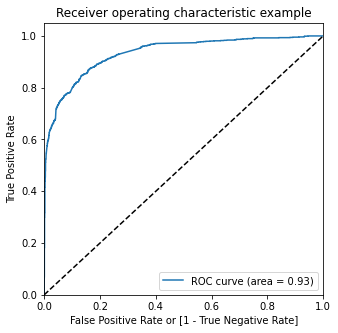

In [166]:
# Creating ROC for test data
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted,y_test_pred_final.Conversion_Probability, drop_intermediate = False )

# Calling the function
draw_roc(y_test_pred_final.Converted,y_test_pred_final.Conversion_Probability)